## Introducción al aprendizaje supervisado

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from time import time
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, LabelEncoder, Binarizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from visualization import plot_confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RF
np.random.seed(42)

### Actividades:

#### Dataset rain_teodelina

1) agregar features que aporten valor al dataset  

2) Analizar features data / target 

3) dividir dataset (training, validation, test)    

4) analizar y elegir el modelo mas apropiado, entrenarlo y analizar resultados  

5) combinar clasificadores y analizar resultados  

6) evaluar predicciones de los diferentes modelos  

In [39]:
rain_t = pd.read_csv("rain_teodelina.csv", parse_dates = ["date"], index_col=[0])
rain_t.head()

,rain
date,
1978-01-01,0
1978-01-02,0
1978-01-03,0
1978-01-04,0
1978-01-05,0


In [40]:
rain_t.describe(include='all')

,rain
count,15034.000000
mean,3.331914
std,11.451975
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,220.000000


In [41]:
missing_values_count_t = rain_t.isnull().sum()
missing_values_count_t[missing_values_count_t > 0]

Series([], dtype: int64)

In [42]:
rain_t['mes'] = rain_t.index.month
rain_t['año'] = rain_t.index.year
#lluvias['mesHid'] = (lluvias.index.month+5)%12+1
rain_t['añoHid'] = (rain_t.index + dt.timedelta(days=181))
rain_t['mesHid'] = rain_t.añoHid.dt.month

In [43]:
rain_t.describe(include='all')

,rain,mes,año,añoHid,mesHid
count,15034.000000,15034.000000,15034.000000,15034,15034.000000
unique,NaN,NaN,NaN,15034,NaN
top,NaN,NaN,NaN,1989-12-27 00:00:00,NaN
freq,NaN,NaN,NaN,1,NaN
first,NaN,NaN,NaN,1978-07-01 00:00:00,NaN
last,NaN,NaN,NaN,2019-08-28 00:00:00,NaN
mean,3.331914,6.503193,1998.082413,NaN,6.526739
std,11.451975,3.456608,11.881857,NaN,3.442680
min,0.000000,1.000000,1978.000000,NaN,1.000000
25%,0.000000,3.250000,1988.000000,NaN,4.000000


In [44]:
AcumMensual = pd.pivot_table(rain_t, values='rain', index=['año'],columns=['mes'], aggfunc=np.sum, margins=True)

In [45]:
sumas_short = AcumMensual.drop(['All'], axis=1)
sumas_short = sumas_short.drop([2019,'All'], axis=0)
sumas_short

mes,1,2,3,4,5,6,7,8,9,10,11,12
año,,,,,,,,,,,,
1978,217.0,140.0,204.0,77.0,29.0,16.0,68.0,22.0,303.0,132.0,235.0,50.0
1979,110.0,173.0,166.0,89.0,14.0,47.0,17.0,9.0,29.0,69.0,190.0,120.0
1980,21.0,113.0,214.0,174.0,30.0,54.0,11.0,5.0,17.0,173.0,112.0,107.0
1981,297.0,108.0,179.0,92.0,82.0,35.0,16.0,1.0,47.0,103.0,147.0,81.0
1982,228.0,199.0,103.0,111.0,3.0,26.0,13.0,0.0,107.0,31.0,133.0,52.0
1983,113.0,148.0,52.0,86.0,50.0,6.0,5.0,32.0,11.0,202.0,127.0,40.0
1984,203.0,365.0,113.0,39.0,30.0,12.0,12.0,24.0,74.0,160.0,105.0,81.0
1985,83.0,149.0,61.0,82.0,62.0,0.0,85.0,36.0,71.0,158.0,147.0,75.0
1986,331.0,50.0,37.0,139.0,22.0,40.0,6.0,31.0,79.0,150.0,131.0,16.0


In [46]:
precipitation = rain_t.rain

consecutive_dry = [1 if data == 0 else 0 for data in precipitation]
for i in range(1, len(consecutive_dry)):
    if consecutive_dry[i] == 1:
        consecutive_dry[i] += consecutive_dry[i - 1]
        
consecutive_wet = [1 if data > 0 else 0 for data in precipitation]
for i in range(1, len(consecutive_wet)):
    if consecutive_wet[i] == 1:
        consecutive_wet[i] += consecutive_wet[i - 1]

rain_t['cons_dry'] = consecutive_dry
rain_t['cons_wet'] = consecutive_wet

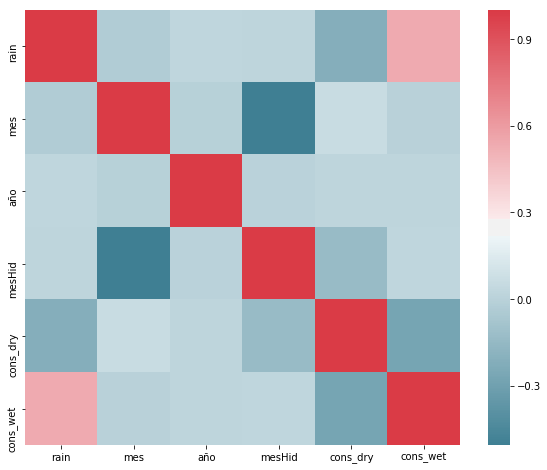

In [47]:
corr_t = rain_t.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_t, mask=np.zeros_like(corr_t, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [48]:
y_orig = rain_t['rain']  #columnas objetivo
X_orig = rain_t.drop('rain', axis=1)  #columnas independientes

In [49]:
X2 = X_orig.drop('añoHid', axis=1)
X3 = np.around(X2, decimals = 0, out = None)
X3 = X3.astype(int)
y3 = np.around(y_orig, decimals = 0, out = None)
y3 = y3.astype(int)

In [50]:
# split training dataset into test and train 
# (we won't be using testing sets here, because of the cross-validation; but it couldn be useful)
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42) ##test_size conviene 0.2???

In [51]:
results = pd.DataFrame(columns=('clf', 'best_res'))

## Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class = 'auto', random_state = 42)
lr_param = {'penalty':('l2', 'l1'), 'C':[1.0], 'warm_start':[True, False]}

lr_clf = GridSearchCV(lr, lr_param, cv=5, iid=False)
start = time()
lr_clf.fit(X_train, y_train)
best_lr_clf = lr_clf.best_estimator_
print('Best Log Reg: ', lr_clf.best_score_)
print(best_lr_clf)
results = results.append({'clf': best_lr_clf, 'best_res': lr_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_res'].idxmax()]['clf'])

print("Log Reg tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(lr_clf.cv_results_['params'])))
for i in range(len(lr_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(lr_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  lr_clf.cv_results_['mean_test_score'][candidato],
                  lr_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(lr_clf.cv_results_['params'][candidato]))
        print("")


/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarni

Best Log Reg:  0.8498338279385955
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=True)
The best classifier so far is: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=True)
Log Reg tomó 52.74 segundos para 4 configuraciones de parámetros candidatos.
El modelo con el ranking: 1
Scores de validación Medios: 0.850 (std: 0.012)
Parametros: {'C': 1.0, 'penalty': 'l1', 'warm_start': True}

El modelo con el ranking: 1
Scores de validación Medios: 0.850 (std: 0.012)
Parametros: {'C': 1.0, 'penalty': 'l1', 'warm_start': False}

El modelo con el ranking: 3
Scores de validación Medios: 0.8

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [52]:
from sklearn.linear_model import LogisticRegression

results = pd.DataFrame(columns=('clf', 'best_res'))

lr_clf2 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=True)

lr_clf2.fit(X_train, y_train)
results = results.append({'clf': lr_clf2}, ignore_index=True)

print('Logistic Regression:')
print('Score para entrenamiento: %.2f' % 
      accuracy_score(y_train, lr_clf2.predict(X_train)))
print('Score para evaluación: %.2f' %
      accuracy_score(y_test, lr_clf2.predict(X_test)))

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression:
Score para entrenamiento: 0.85
Score para evaluación: 0.84


In [123]:
results = pd.DataFrame(columns=('clf', 'best_res'))

## Stochastic Gradient
from sklearn.linear_model import SGDClassifier


#parameters_SGDC = {'loss':('hinge', 'log'), 'max_iter': [10000], 'tol': [0.001]}
parameters_SGDC = {'loss':('hinge', 'log'), 'learning_rate':('adaptive', 'optimal', 'invscaling'),
              'penalty':('l2', 'l1', 'elasticnet'), 'alpha':[0.0001], 'max_iter': [10000], 
              'eta0': [0.1], 'tol': [0.001]}
SGDC = SGDClassifier(random_state=42)
SGDC_clf = GridSearchCV(SGDC, parameters_SGDC, cv=5, iid = False, return_train_score = True)
start = time()
SGDC_clf.fit(X_train, y_train)
best_SGDC_clf = SGDC_clf.best_estimator_

print('Best SGDC score: ', SGDC_clf.best_score_)
print(best_SGDC_clf)
results = results.append({'clf': best_SGDC_clf, 'best_res': SGDC_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_res'].idxmax()]['clf'])
print("")

print("GridSearchCV tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(SGDC_clf.cv_results_['params'])))
for i in range(len(SGDC_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(SGDC_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  SGDC_clf.cv_results_['mean_test_score'][candidato],
                  SGDC_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(SGDC_clf.cv_results_['params'][candidato]))
        print("")

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best SGDC score:  0.844255405679211
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge',
       max_iter=10000, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l1', power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)
The best classifier so far is: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge',
       max_iter=10000, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l1', power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

GridSearchCV tomó 2370.59 segundos para 18 configuraciones de parámetros candidatos.
El modelo con el ranking: 1
Scores de valida

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [124]:
from sklearn.linear_model import SGDClassifier

results = pd.DataFrame(columns=('clf', 'best_res'))

SGDC_clf2 = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge',
       max_iter=10000, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l1', power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

SGDC_clf2.fit(X_train, y_train)
results = results.append({'clf': SGDC_clf2}, ignore_index=True)

print('Stochastic Descendent Gradient:')
print('Score para entrenamiento: %.2f' % 
      accuracy_score(y_train, SGDC_clf2.predict(X_train)))
print('Score para evaluación: %.2f' %
      accuracy_score(y_test, SGDC_clf2.predict(X_test)))

Stochastic Descendent Gradient:
Score para entrenamiento: 0.84
Score para evaluación: 0.83


/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


#### Dataset: rain_junin

1) Aplicar tecnicas de selección y extraccion de features  

2) Analizar features data / target 

3) dividir dataset (training, validation, test)  

4) analizar y elegir el modelo mas apropiado, entrenarlo y analizar resultados

5) combinar clasificadores y analizar resultados  

6) evaluar predicciones de los diferentes modelos  

In [125]:
rain_junin = pd.read_csv("rain_junin.csv", parse_dates = ["Fecha"], index_col=[0])
rain_junin.head()

,Hr.Med(%),Prec(mm),Presion(mb).Est,Presion(mb).Mar,Temperatura(°C).Max,Temperatura(°C).Med,Temperatura(°C).Min,Viento(km/h).Max,Viento(km/h).Med,Vis(km)
Fecha,,,,,,,,,,
2016-01-01,71.8,7.9,1000.1,1009.5,31.4,24.0,18.4,27.8,16.7,12.4
2016-01-02,67.8,0.0,1002.0,1011.4,32.1,25.6,20.3,25.9,19.3,12.8
2016-01-03,79.1,0.0,1001.0,1010.4,31.6,23.7,20.0,37.0,21.7,12.6
2016-01-04,91.5,0.0,999.6,1009.0,26.9,22.2,20.8,18.3,10.7,10.4
2016-01-05,79.6,9.9,1002.6,1012.0,28.4,23.6,19.8,24.1,14.4,11.3


In [126]:
rain_junin.describe(include='all')

,Hr.Med(%),Prec(mm),Presion(mb).Est,Presion(mb).Mar,Temperatura(°C).Max,Temperatura(°C).Med,Temperatura(°C).Min,Viento(km/h).Max,Viento(km/h).Med,Vis(km)
count,1066.000000,1050.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1065.000000,1066.000000,1066.000000
mean,69.875141,3.424095,1005.528424,1015.193621,23.837523,16.232176,10.133865,24.056901,14.788180,12.209287
std,12.923685,11.106181,6.087682,6.271942,6.503449,5.732337,5.833879,8.268677,5.480464,2.315869
min,29.400000,0.000000,991.100000,1000.400000,8.600000,2.800000,-6.200000,7.600000,2.800000,2.600000
25%,60.900000,0.000000,1001.400000,1010.900000,18.825000,11.600000,6.000000,18.300000,10.900000,11.100000
50%,70.500000,0.000000,1005.100000,1014.850000,24.200000,16.450000,10.200000,24.100000,14.100000,12.600000
75%,79.500000,0.000000,1009.600000,1019.400000,29.200000,20.800000,14.875000,29.400000,18.500000,13.900000
max,97.800000,151.900000,1024.800000,1034.900000,36.800000,29.000000,22.500000,53.500000,38.700000,17.200000


In [127]:
#rain_junin = rain_junin.drop(['Prec(mm)'], axis=1)
rain_junin.head()

,Hr.Med(%),Prec(mm),Presion(mb).Est,Presion(mb).Mar,Temperatura(°C).Max,Temperatura(°C).Med,Temperatura(°C).Min,Viento(km/h).Max,Viento(km/h).Med,Vis(km)
Fecha,,,,,,,,,,
2016-01-01,71.8,7.9,1000.1,1009.5,31.4,24.0,18.4,27.8,16.7,12.4
2016-01-02,67.8,0.0,1002.0,1011.4,32.1,25.6,20.3,25.9,19.3,12.8
2016-01-03,79.1,0.0,1001.0,1010.4,31.6,23.7,20.0,37.0,21.7,12.6
2016-01-04,91.5,0.0,999.6,1009.0,26.9,22.2,20.8,18.3,10.7,10.4
2016-01-05,79.6,9.9,1002.6,1012.0,28.4,23.6,19.8,24.1,14.4,11.3


In [128]:
rain_junin.describe()

,Hr.Med(%),Prec(mm),Presion(mb).Est,Presion(mb).Mar,Temperatura(°C).Max,Temperatura(°C).Med,Temperatura(°C).Min,Viento(km/h).Max,Viento(km/h).Med,Vis(km)
count,1066.000000,1050.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1065.000000,1066.000000,1066.000000
mean,69.875141,3.424095,1005.528424,1015.193621,23.837523,16.232176,10.133865,24.056901,14.788180,12.209287
std,12.923685,11.106181,6.087682,6.271942,6.503449,5.732337,5.833879,8.268677,5.480464,2.315869
min,29.400000,0.000000,991.100000,1000.400000,8.600000,2.800000,-6.200000,7.600000,2.800000,2.600000
25%,60.900000,0.000000,1001.400000,1010.900000,18.825000,11.600000,6.000000,18.300000,10.900000,11.100000
50%,70.500000,0.000000,1005.100000,1014.850000,24.200000,16.450000,10.200000,24.100000,14.100000,12.600000
75%,79.500000,0.000000,1009.600000,1019.400000,29.200000,20.800000,14.875000,29.400000,18.500000,13.900000
max,97.800000,151.900000,1024.800000,1034.900000,36.800000,29.000000,22.500000,53.500000,38.700000,17.200000


En primer lugar, previo al análisis de Features, se cuantifican el número de datos faltantes para su posterior procesamiento:

In [129]:
missing_values_count = rain_junin.isnull().sum()
missing_values_count[missing_values_count > 0]

Hr.Med(%)              30
Prec(mm)               46
Presion(mb).Est        30
Presion(mb).Mar        30
Temperatura(°C).Max    30
Temperatura(°C).Med    30
Temperatura(°C).Min    30
Viento(km/h).Max       31
Viento(km/h).Med       30
Vis(km)                30
dtype: int64

Todos los datos son tipo "int64" y el número de datos faltantes es del orden de 30, salvo para las precipitaciones que resultan del orden de 46. Para procesarlos, a continuación realizaremos una interpolación:

In [130]:
rain_junin_clean = rain_junin.interpolate()

missing_values_count = rain_junin_clean.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

No existen más datos faltantes. A continuación, realizaremos el análisis de selección de Features.

Una técnica de análisis de los features más sensibles es aplicar una matriz de correlaciones y plotearlo con un mapa de Heatmap para ayudar en la interpretación de los resultados:

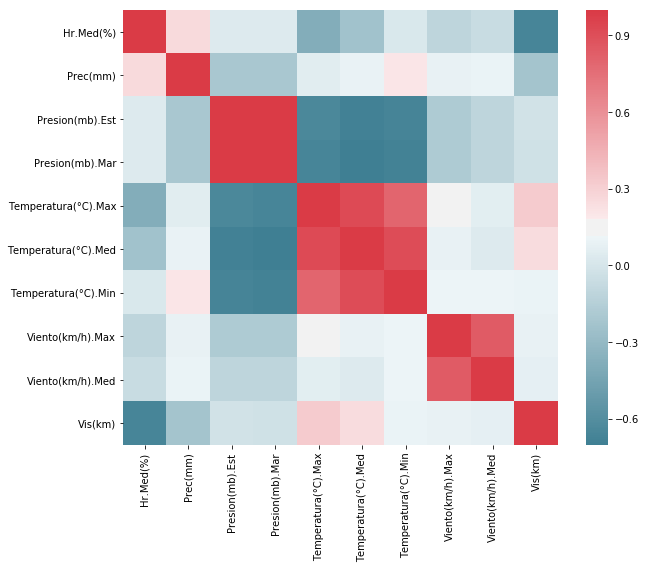

In [131]:
corr = rain_junin_clean.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [132]:
rain_junin_clean.columns

Index(['Hr.Med(%)', 'Prec(mm)', 'Presion(mb).Est', 'Presion(mb).Mar',
       'Temperatura(°C).Max', 'Temperatura(°C).Med', 'Temperatura(°C).Min',
       'Viento(km/h).Max', 'Viento(km/h).Med', 'Vis(km)'],
      dtype='object')

A continuación, se seleccionarán las features más representativas a partir de "SelectKBest"

In [ ]:
y_orig = rain_junin_clean['Prec(mm)']  #columnas objetivo
X_orig = rain_junin_clean.drop('Prec(mm)', axis=1)  #columnas independientes
#X1 = X_orig.drop('Fecha', axis=1)
#X1.describe()

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_orig,y_orig)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_orig.columns)
feat_importances.nlargest(9).plot(kind='barh')
f1 = feat_importances.nlargest(6)
plt.show()
X2 = X_orig[f1.index]
X2

A continuación se normalizan los valores anteriores.

In [ ]:
scaler = Normalizer().fit(X2)
#scaler = StandardScaler().fit(X2)
std_X2 = scaler.transform(X2)
std_X2

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc_X_train = sc.fit_transform(X_train)
# sc_X_test = sc.transform(X_test)

Como arrojaban errores de que no podía ajustarse el algoritmo de regresión lineal o logística a los datos anteriores por ser del tipo flotante, se los redondeó de la siguiente manera:

In [ ]:
X3 = np.around(X2, decimals = 0, out = None)
X3 = X3.astype(int)
y3 = np.around(y_orig, decimals = 0, out = None)
y3 = y3.astype(int)

Los set de train y test se repartieron en 70% y 30% respectivamente:

In [ ]:
# split training dataset into test and train 
# (we won't be using testing sets here, because of the cross-validation; but it couldn be useful)
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42) ##test_size conviene 0.2???

La regresión Logística dió muy buenos resultados. Cabe resaltar que el accuracy es una métrica de Clasificación y en este caso estamos lidiando con Regresión.

In [ ]:
results = pd.DataFrame(columns=('clf', 'best_res'))

## Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class = 'auto', random_state = 42)
lr_param = {'penalty':('l2', 'l1'), 'C':[1.0], 'warm_start':[True, False]}

lr_clf = GridSearchCV(lr, lr_param, cv=5, iid=False)
start = time()
lr_clf.fit(X_train, y_train)
best_lr_clf = lr_clf.best_estimator_
print('Best Log Reg: ', lr_clf.best_score_)
print(best_lr_clf)
results = results.append({'clf': best_lr_clf, 'best_res': lr_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_res'].idxmax()]['clf'])

print("Log Reg tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(lr_clf.cv_results_['params'])))
for i in range(len(lr_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(lr_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  lr_clf.cv_results_['mean_test_score'][candidato],
                  lr_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(lr_clf.cv_results_['params'][candidato]))
        print("")


In [ ]:
from sklearn.linear_model import LogisticRegression

results = pd.DataFrame(columns=('clf', 'best_res'))

lr_clf2 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=True)

lr_clf2.fit(X_train, y_train)
results = results.append({'clf': lr_clf2}, ignore_index=True)

print('Logistic Regression:')
print('Score para entrenamiento: %.2f' % 
      accuracy_score(y_train, lr_clf2.predict(X_train)))
print('Score para evaluación: %.2f' %
      accuracy_score(y_test, lr_clf2.predict(X_test)))

In [ ]:
results = pd.DataFrame(columns=('clf', 'best_res'))

## Stochastic Gradient
from sklearn.linear_model import SGDClassifier


#parameters_SGDC = {'loss':('hinge', 'log'), 'max_iter': [10000], 'tol': [0.001]}
parameters_SGDC = {'loss':('hinge', 'log'), 'learning_rate':('adaptive', 'optimal', 'invscaling'),
              'penalty':('l2', 'l1', 'elasticnet'), 'alpha':[0.0001], 'max_iter': [10000], 
              'eta0': [0.1], 'tol': [0.001]}
SGDC = SGDClassifier(random_state=42)
SGDC_clf = GridSearchCV(SGDC, parameters_SGDC, cv=5, iid = False, return_train_score = True)
start = time()
SGDC_clf.fit(X_train, y_train)
best_SGDC_clf = SGDC_clf.best_estimator_

print('Best SGDC score: ', SGDC_clf.best_score_)
print(best_SGDC_clf)
results = results.append({'clf': best_SGDC_clf, 'best_res': SGDC_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_res'].idxmax()]['clf'])
print("")

print("GridSearchCV tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(SGDC_clf.cv_results_['params'])))
for i in range(len(SGDC_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(SGDC_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  SGDC_clf.cv_results_['mean_test_score'][candidato],
                  SGDC_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(SGDC_clf.cv_results_['params'][candidato]))
        print("")

In [ ]:
from sklearn.linear_model import SGDClassifier

results = pd.DataFrame(columns=('clf', 'best_res'))

SGDC_clf2 = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge',
       max_iter=10000, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

SGDC_clf2.fit(X_train, y_train)
results = results.append({'clf': SGDC_clf2}, ignore_index=True)

print('Stochastic Descendent Gradient:')
print('Score para entrenamiento: %.2f' % 
      accuracy_score(y_train, SGDC_clf2.predict(X_train)))
print('Score para evaluación: %.2f' %
      accuracy_score(y_test, SGDC_clf2.predict(X_test)))

In [ ]:
results = pd.DataFrame(columns=('clf', 'best_res'))

## Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_param = {}

lr_clf = GridSearchCV(lr, lr_param, cv=5, iid=False)
start = time()
lr_clf.fit(X_train, y_train)
best_lr_clf = lr_clf.best_estimator_
print('Best Log Reg: ', lr_clf.best_score_)
print(best_lr_clf)
results = results.append({'clf': best_lr_clf, 'best_res': lr_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_res'].idxmax()]['clf'])

print("Log Reg tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(lr_clf.cv_results_['params'])))
for i in range(len(lr_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(lr_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  lr_clf.cv_results_['mean_test_score'][candidato],
                  lr_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(lr_clf.cv_results_['params'][candidato]))
        print("")


In [ ]:
results = pd.DataFrame(columns=('clf', 'best_res'))

## Random Forest - Regression
from sklearn.ensemble import RandomForestRegressor as RFR #Javier: Leer y probar otros parámetros.
from scipy.stats import randint as sp_randint

tree_param_dist = {'max_depth': sp_randint(1, 25),
#                    'max_features': sp_randint(4, 10),
                   'min_samples_split': sp_randint(2, 25),
                   'bootstrap': [True, False],
                   'warm_start': [True, False],}
#                    'criterion': ['gini', 'entropy']}

# tree_param_dist = {}
tree = RFR(random_state=42, n_estimators=30, min_samples_leaf=1)

tree_clf = RandomizedSearchCV(tree, param_distributions=tree_param_dist, n_iter=30, cv=10, iid=False) 

# start = time()
tree_clf.fit(X_train, y_train)

best_tree_clf = tree_clf.best_estimator_
print('Best Decision Tree: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_res': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_res'].idxmax()]['clf'])

# print("Regression Tree tomó %.2f segundos para %d configuraciones de parámetros candidatos."
#       % (time() - start, len(tree_clf.cv_results_['params'])))
for i in range(len(tree_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(tree_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  tree_clf.cv_results_['mean_test_score'][candidato],
                  tree_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(tree_clf.cv_results_['params'][candidato]))
        print("")

In [ ]:
results = pd.DataFrame(columns=('clf', 'best_res'))

## Linear SVC
from sklearn.svm import LinearSVR

lsvr = LinearSVR(random_state=42)
lsvr_param = {}

lsvr_clf = RandomizedSearchCV(lsvr, lsvr_param, n_iter=30, cv=5, iid=False)
start = time()
lsvr_clf.fit(X_train, y_train)
best_lsvr_clf = lsvr_clf.best_estimator_
print('Best Linear SVR: ', lsvr_clf.best_score_)
print(best_lsvr_clf)
results = results.append({'clf': best_lsvr_clf, 'best_res': lsvr_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_res'].idxmax()]['clf'])

print("Linear SVR tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(lsvr_clf.cv_results_['params'])))
for i in range(len(lsvr_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(lsvr_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  lsvr_clf.cv_results_['mean_test_score'][candidato],
                  lsvr_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(lsvr_clf.cv_results_['params'][candidato]))
        print("")


#### Combinacion de datasets

1) Combinar ambos datasets a partir de features comunes a ambos

2) Validar la correcctitud de los datos fusionados

3) Aplicar tecnicas de selección y extraccion de features  

4) Analizar features data / target 

5) dividir dataset (training, validation, test)  

6) analizar y elegir el modelo mas apropiado, entrenarlo y analizar resultados


---------------

In [40]:
rain_junin_2 = pd.read_csv("rain_junin.csv", parse_dates = ["Fecha"], index_col=[0])
fecha1 = rain_junin_2.index.max()
fecha2 = rain_junin_2.index.min()
rain_teo = pd.read_csv("rain_teodelina.csv", parse_dates = ["date"])
rain_teo = rain_teo[rain_teo.date>=fecha2]
rain_teo = rain_teo[rain_teo.date<=fecha1]
rain_junin_2['rain_teo'] = rain_teo['rain'].values
rain_junin_2['m'] = rain_junin_2.index.month_name()
rain_junin_2.describe(include='all')

,Hr.Med(%),Prec(mm),Presion(mb).Est,Presion(mb).Mar,Temperatura(°C).Max,Temperatura(°C).Med,Temperatura(°C).Min,Viento(km/h).Max,Viento(km/h).Med,Vis(km),rain_teo,m
count,1066.000000,1050.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1065.000000,1066.000000,1066.000000,1096.000000,1096
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93
mean,69.875141,3.424095,1005.528424,1015.193621,23.837523,16.232176,10.133865,24.056901,14.788180,12.209287,4.578467,NaN
std,12.923685,11.106181,6.087682,6.271942,6.503449,5.732337,5.833879,8.268677,5.480464,2.315869,15.839758,NaN
min,29.400000,0.000000,991.100000,1000.400000,8.600000,2.800000,-6.200000,7.600000,2.800000,2.600000,0.000000,NaN
25%,60.900000,0.000000,1001.400000,1010.900000,18.825000,11.600000,6.000000,18.300000,10.900000,11.100000,0.000000,NaN
50%,70.500000,0.000000,1005.100000,1014.850000,24.200000,16.450000,10.200000,24.100000,14.100000,12.600000,0.000000,NaN
75%,79.500000,0.000000,1009.600000,1019.400000,29.200000,20.800000,14.875000,29.400000,18.500000,13.900000,0.000000,NaN


In [41]:
def normalize_col(float_array):
    min_max_scaler = MinMaxScaler()
    return min_max_scaler.fit_transform(float_array)

col_names = [ 'Hr.Med(%)', 'Prec(mm)', 'Presion(mb).Est', 'Presion(mb).Mar', 'Temperatura(°C).Max',
             'Temperatura(°C).Med', 'Temperatura(°C).Min', 'Viento(km/h).Max', 'Viento(km/h).Med', 'Vis(km)' ]
for col_name in col_names:
    rain_junin_2[col_name] = normalize_col(rain_junin_2[col_name].values.astype(float).reshape(-1, 1))

In [42]:
rain_junin_2.head(5)

,Hr.Med(%),Prec(mm),Presion(mb).Est,Presion(mb).Mar,Temperatura(°C).Max,Temperatura(°C).Med,Temperatura(°C).Min,Viento(km/h).Max,Viento(km/h).Med,Vis(km),rain_teo,m
Fecha,,,,,,,,,,,,
2016-01-01,0.619883,0.052008,0.267062,0.263768,0.808511,0.809160,0.857143,0.440087,0.387187,0.671233,0,January
2016-01-02,0.561404,0.000000,0.323442,0.318841,0.833333,0.870229,0.923345,0.398693,0.459610,0.698630,0,January
2016-01-03,0.726608,0.000000,0.293769,0.289855,0.815603,0.797710,0.912892,0.640523,0.526462,0.684932,6,January
2016-01-04,0.907895,0.000000,0.252226,0.249275,0.648936,0.740458,0.940767,0.233115,0.220056,0.534247,0,January
2016-01-05,0.733918,0.065174,0.341246,0.336232,0.702128,0.793893,0.905923,0.359477,0.323120,0.595890,90,January
2016-01-06,0.347953,0.000000,0.477745,0.472464,0.726950,0.725191,0.689895,0.283224,0.401114,0.773973,5,January
2016-01-07,0.448830,0.000000,0.451039,0.446377,0.687943,0.709924,0.703833,0.193900,0.183844,0.773973,0,January
2016-01-08,0.535088,0.005267,0.338279,0.333333,0.723404,0.751908,0.808362,0.156863,0.153203,0.719178,0,January
2016-01-09,0.733918,0.000000,0.409496,0.405797,0.762411,0.698473,0.836237,0.359477,0.303621,0.719178,0,January


In [43]:
rain_junin_2 = pd.get_dummies(data=rain_junin_2,columns=['m'])

In [44]:
rain_junin_2.head(5)

,Hr.Med(%),Prec(mm),Presion(mb).Est,Presion(mb).Mar,Temperatura(°C).Max,Temperatura(°C).Med,Temperatura(°C).Min,Viento(km/h).Max,Viento(km/h).Med,Vis(km),...,m_December,m_February,m_January,m_July,m_June,m_March,m_May,m_November,m_October,m_September
Fecha,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.619883,0.052008,0.267062,0.263768,0.808511,0.809160,0.857143,0.440087,0.387187,0.671233,...,0,0,1,0,0,0,0,0,0,0
2016-01-02,0.561404,0.000000,0.323442,0.318841,0.833333,0.870229,0.923345,0.398693,0.459610,0.698630,...,0,0,1,0,0,0,0,0,0,0
2016-01-03,0.726608,0.000000,0.293769,0.289855,0.815603,0.797710,0.912892,0.640523,0.526462,0.684932,...,0,0,1,0,0,0,0,0,0,0
2016-01-04,0.907895,0.000000,0.252226,0.249275,0.648936,0.740458,0.940767,0.233115,0.220056,0.534247,...,0,0,1,0,0,0,0,0,0,0
2016-01-05,0.733918,0.065174,0.341246,0.336232,0.702128,0.793893,0.905923,0.359477,0.323120,0.595890,...,0,0,1,0,0,0,0,0,0,0
2016-01-06,0.347953,0.000000,0.477745,0.472464,0.726950,0.725191,0.689895,0.283224,0.401114,0.773973,...,0,0,1,0,0,0,0,0,0,0
2016-01-07,0.448830,0.000000,0.451039,0.446377,0.687943,0.709924,0.703833,0.193900,0.183844,0.773973,...,0,0,1,0,0,0,0,0,0,0
2016-01-08,0.535088,0.005267,0.338279,0.333333,0.723404,0.751908,0.808362,0.156863,0.153203,0.719178,...,0,0,1,0,0,0,0,0,0,0
2016-01-09,0.733918,0.000000,0.409496,0.405797,0.762411,0.698473,0.836237,0.359477,0.303621,0.719178,...,0,0,1,0,0,0,0,0,0,0


In [48]:
junin_2_miss_val_count = rain_junin_2.isnull().sum()
junin_2_miss_val_count[junin_2_miss_val_count > 0]

Hr.Med(%)              30
Prec(mm)               46
Presion(mb).Est        30
Presion(mb).Mar        30
Temperatura(°C).Max    30
Temperatura(°C).Med    30
Temperatura(°C).Min    30
Viento(km/h).Max       31
Viento(km/h).Med       30
Vis(km)                30
dtype: int64

In [65]:
rain_junin_2.dropna(axis=0, inplace=True, how='any', subset=['Prec(mm)', 'Viento(km/h).Max'])

In [66]:
junin_2_miss_val_count = rain_junin_2.isnull().sum()
junin_2_miss_val_count[junin_2_miss_val_count > 0]

Series([], dtype: int64)

In [89]:
y_orig_junin2 = Binarizer().transform(rain_junin_2['rain_teo'].values.reshape(-1, 1)).ravel() #columnas objetivo
X_orig_junin2 = rain_junin_2.drop('rain_teo', axis=1)  #columnas independientes

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_orig_junin2, y_orig_junin2, test_size=0.2, random_state=42)

#### Stochastic Gradient Descent 

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

# Exploración de hiperparámetros de SGD para función de coste "hinge"

Mejor conjunto de parámetros:
{'alpha': 0.00035, 'eta0': 0.1, 'learning_rate': 'constant'}

Score f1
Mejor valor: 0.519

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de test: 0.886 

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       177
           1       0.74      0.42      0.54        33

   micro avg       0.89      0.89      0.89       210
   macro avg       0.82      0.70      0.74       210
weighted avg       0.87      0.89      0.87       210




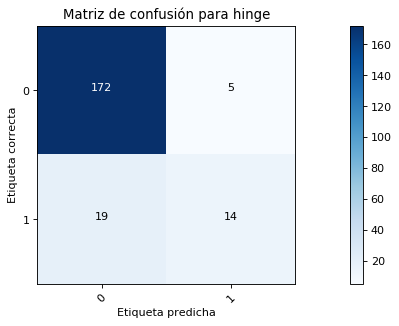

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

# Exploración de hiperparámetros de SGD para función de coste "log"

Mejor conjunto de parámetros:
{'alpha': 0.00035, 'eta0': 0.1, 'learning_rate': 'constant'}

Score f1
Mejor valor: 0.523

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de test: 0.881 

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       177
           1       0.79      0.33      0.47        33

   micro avg       0.88      0.88      0.88       210
   macro avg       0.84      0.66      0.70       210
weighted avg       0.87      0.88      0.86       210




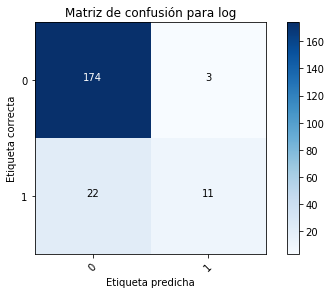

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

# Exploración de hiperparámetros de SGD para función de coste "perceptron"

Mejor conjunto de parámetros:
{'alpha': 0.001, 'eta0': 0.001, 'learning_rate': 'adaptive'}

Score f1
Mejor valor: 0.597

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de test: 0.890 

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       177
           1       0.62      0.76      0.68        33

   micro avg       0.89      0.89      0.89       210
   macro avg       0.79      0.84      0.81       210
weighted avg       0.90      0.89      0.89       210




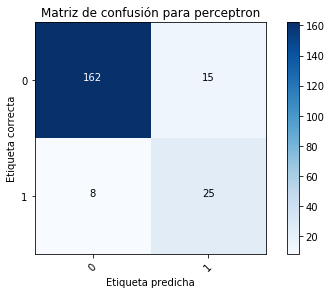

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

# Exploración de hiperparámetros de SGD para función de coste "epsilon_insensitive"

Mejor conjunto de parámetros:
{'alpha': 0.00035, 'eta0': 0.1, 'learning_rate': 'constant'}

Score f1
Mejor valor: 0.225

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de test: 0.871 

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       177
           1       0.88      0.21      0.34        33

   micro avg       0.87      0.87      0.87       210
   macro avg       0.87      0.60      0.64       210
weighted avg       0.87      0.87      0.84       210




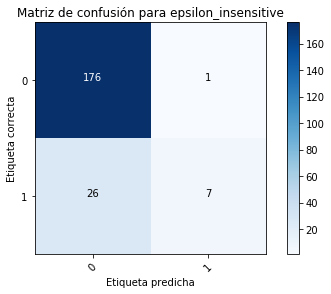


El mejor clasificador es: 

Funcion loss: perceptron 
Conjunto de parametros: SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
       l1_ratio=0.15, learning_rate='adaptive', loss='perceptron',
       max_iter=2000, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False) 
Score: 0.5966681398651542



In [114]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
scoring_value=0.0
score='f1' # accuracy, precision, recall, roc-auc
results_SGD = pd.DataFrame(columns=('clf', 'best_acc'))

for idx, loss in enumerate(('hinge', 'log', 'perceptron', 'epsilon_insensitive'), start=1):
    exploring_params = {
        'learning_rate': ['constant', 'optimal', 'adaptive'],
        'eta0': [0.1, 0.01, 0.001, 0.0002 ],  # Tasa de entrenamiento
        'alpha': [0.1, 0.01, 0.001, 0.00035]  # Tasa de regularización
    }
    m = SGDClassifier(loss=loss, tol=1e-3, max_iter=2000, random_state=42)
    model = GridSearchCV(m, exploring_params, cv=5, scoring=score)
    model.fit(X_train, y_train)
    
    print("# Exploración de hiperparámetros de SGD para función de coste \"%s\"" % loss, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")
    print("Score %s" % score) 
    print("Mejor valor: %0.3f" %  model.best_score_, end="\n\n") # 

    if(model.best_score_ > scoring_value):
        results_SGD = results_SGD.append({'clf': model.best_estimator_, 'best_acc': model.best_score_,
                                          'loss_func': loss},
                                          ignore_index=True)

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print("Exactitud para conjunto de test: %0.3f " % accuracy_score(y_true, y_pred), end="\n\n")
    print(classification_report(y_true, y_pred), end="\n\n")
    
    plt.subplot(1, 1, 1)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=('0', '1'), title="Matriz de confusión para %s" % loss)
    plt.show()
    
    print("================================================", end="\n\n")

print('El mejor clasificador es: ', end="\n\n")
print("Funcion loss: %s " % results_SGD.loc[results_SGD['best_acc'].idxmax()]['loss_func'], end="\n")
print("Conjunto de parametros: %s " % results_SGD.loc[results_SGD['best_acc'].idxmax()]['clf'], end="\n")
print("Score: %s" %results_SGD.loc[results_SGD['best_acc'].idxmax()]['best_acc'], end="\n\n")

#### Decision Tree

# Exploración de hiperparámetros de DT para profundidad del arbol "2"

Mejor conjunto de parámetros:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Score f1
Mejor valor: 0.606

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de test: 0.857 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       177
           1       0.53      0.70      0.61        33

   micro avg       0.86      0.86      0.86       210
   macro avg       0.74      0.79      0.76       210
weighted avg       0.88      0.86      0.86       210




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


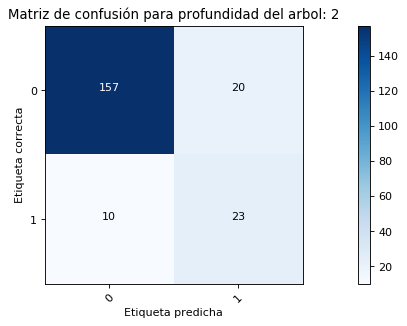


# Exploración de hiperparámetros de DT para profundidad del arbol "5"

Mejor conjunto de parámetros:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Score f1
Mejor valor: 0.606

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de test: 0.857 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       177
           1       0.53      0.70      0.61        33

   micro avg       0.86      0.86      0.86       210
   macro avg       0.74      0.79      0.76       210
weighted avg       0.88      0.86      0.86       210




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


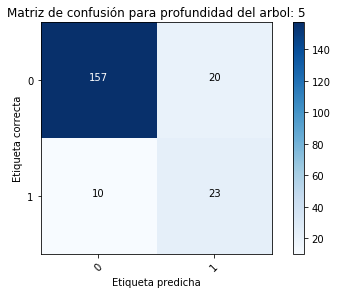


# Exploración de hiperparámetros de DT para profundidad del arbol "6"

Mejor conjunto de parámetros:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Score f1
Mejor valor: 0.606

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de test: 0.857 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       177
           1       0.53      0.70      0.61        33

   micro avg       0.86      0.86      0.86       210
   macro avg       0.74      0.79      0.76       210
weighted avg       0.88      0.86      0.86       210




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


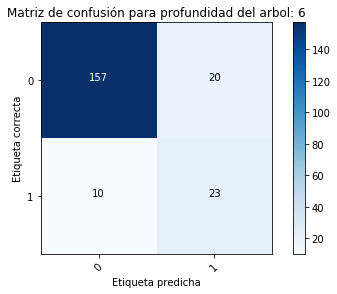


# Exploración de hiperparámetros de DT para profundidad del arbol "7"

Mejor conjunto de parámetros:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Score f1
Mejor valor: 0.606

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de test: 0.857 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       177
           1       0.53      0.70      0.61        33

   micro avg       0.86      0.86      0.86       210
   macro avg       0.74      0.79      0.76       210
weighted avg       0.88      0.86      0.86       210




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


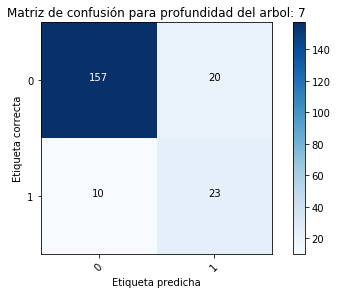


# Exploración de hiperparámetros de DT para profundidad del arbol "8"

Mejor conjunto de parámetros:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Score f1
Mejor valor: 0.606

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de test: 0.857 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       177
           1       0.53      0.70      0.61        33

   micro avg       0.86      0.86      0.86       210
   macro avg       0.74      0.79      0.76       210
weighted avg       0.88      0.86      0.86       210




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


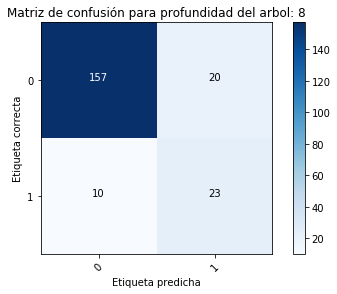


# Exploración de hiperparámetros de DT para profundidad del arbol "10"

Mejor conjunto de parámetros:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Score f1
Mejor valor: 0.606

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de test: 0.857 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       177
           1       0.53      0.70      0.61        33

   micro avg       0.86      0.86      0.86       210
   macro avg       0.74      0.79      0.76       210
weighted avg       0.88      0.86      0.86       210




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


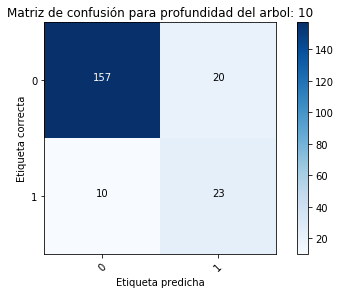


El mejor clasificador es: 

Profundidad del arbol: 2 
Conjunto de parametros: DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best') 
Score: 0.6059312549267436



In [125]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
scoring_value=0.0
score='f1' # accuracy, precision, recall, roc-auc
results_DT = pd.DataFrame(columns=('clf', 'best_acc'))

for idx, depth in enumerate((2, 5, 6, 7, 8, 10), start=1):
    tree_param = {
              'criterion' : [ 'gini', 'entropy' ], 
              'min_samples_leaf' : [ 1, 2, 5],
              'min_samples_split' : [ 2, 3, 5, 10, 50, 100 ],
              'max_leaf_nodes': [ 2, 5, 10, 30, 40, 50],
              'class_weight' : [ 'balanced' ]
    }
    m = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model = GridSearchCV(m, tree_param, scoring=score, cv=5)
    model.fit(X_train, y_train)
    
    print("# Exploración de hiperparámetros de DT para profundidad del arbol \"%d\"" % depth, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")
    print("Score %s" % score) 
    print("Mejor valor: %0.3f" %  model.best_score_, end="\n\n") # 

    if(model.best_score_ > scoring_value):
        results_DT = results_DT.append({'clf': model.best_estimator_, 'best_acc': model.best_score_,
                                          'tree_depth': depth},
                                          ignore_index=True)

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print("Exactitud para conjunto de test: %0.3f " % accuracy_score(y_true, y_pred), end="\n\n")
    print(classification_report(y_true, y_pred), end="\n\n")
    
    plt.subplot(1, 1, 1)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=('0', '1'), title="Matriz de confusión para profundidad del arbol: %d" % depth)
    plt.show()
    
    print("================================================", end="\n\n")

print('El mejor clasificador es: ', end="\n\n")
print("Profundidad del arbol: %d " % results_DT.loc[results_DT['best_acc'].idxmax()]['tree_depth'], end="\n")
print("Conjunto de parametros: %s " % results_DT.loc[results_DT['best_acc'].idxmax()]['clf'], end="\n")
print("Score: %s" %results_DT.loc[results_DT['best_acc'].idxmax()]['best_acc'], end="\n\n")

#### Random Forest

In [ ]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
scoring_value=0.0
score='f1' # accuracy, precision, recall, roc-auc
results_RF = pd.DataFrame(columns=('clf', 'best_acc'))

for idx, depth in enumerate((2, 4, 5, 6, 7, 8, 10, 15), start=1):
    rf_param = {
              'criterion' : [ 'gini', 'entropy' ], 
              'min_samples_leaf' : [ 1, 2, 5 ],
              'min_samples_split' : [ 2, 3, 5, 10, 50, 100 ], #  
              'max_leaf_nodes': [ 2, 5, 10, 30, 40, 50 ], #
              'n_estimators' : [ 3, 5, 8, 10, 15 ], 
              'class_weight' : [ 'balanced' ]
              #'min_impurity_split': [ 0.00001, 0.000001, 0.0000001 , 0.00000001 ]
    }
    m = RF(max_depth=depth, random_state=42, n_jobs=-1)
    model = GridSearchCV(m, rf_param, scoring=score, cv=5)
    model.fit(X_train, y_train)
    
    print("# Exploración de hiperparámetros de DT para profundidad del arbol \"%d\"" % depth, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")
    print("Score %s" % score) 
    print("Mejor valor: %0.3f" %  model.best_score_, end="\n\n") # 

    if(model.best_score_ > scoring_value):
        results_RF = results_RF.append({'clf': model.best_estimator_, 'best_acc': model.best_score_,
                                          'tree_depth': depth},
                                          ignore_index=True)

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print("Exactitud para conjunto de test: %0.3f " % accuracy_score(y_true, y_pred), end="\n\n")
    print(classification_report(y_true, y_pred), end="\n\n")
    
    plt.subplot(1, 1, 1)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=('0', '1'), title="Matriz de confusión para profundidad del arbol: %d" % depth)
    plt.show()
    
    print("================================================", end="\n\n")

print('El mejor clasificador es: ', end="\n\n")
print("Profundidad del arbol: %d " % results_RF.loc[results_RF['best_acc'].idxmax()]['tree_depth'], end="\n")
print("Conjunto de parametros: %s " % results_RF.loc[results_RF['best_acc'].idxmax()]['clf'], end="\n")
print("Score: %s" %results_RF.loc[results_RF['best_acc'].idxmax()]['best_acc'], end="\n\n")